In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:/JOEL/important-PDFs/edwisor/Project2_BikeRental/Bike-Renting-master/day.csv')
print (df.head())
print (df.shape)
# the data is relatively low: (731, 16)

# because 'dteday' is a categorical-object, we will keep only the day-number information as object type
days = list(df['dteday'])
days = [int(d[-2:]) for d in days]
df['dteday'] = np.array(days).astype('object')
print (df['dteday'][:10])

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(731, 16)
0     1
1     2


instant :  int64
dteday :  object
season :  int64
yr :  int64
mnth :  int64
holiday :  int64
weekday :  int64
workingday :  int64
weathersit :  int64
temp :  float64
atemp :  float64
hum :  float64
windspeed :  float64
casual :  int64
registered :  int64
cnt :  int64
season :  object
yr :  object
holiday :  object
weekday :  object
workingday :  object
weathersit :  object
     varaibles  percentage
0      instant         0.0
1       dteday         0.0
2       season         0.0
3           yr         0.0
4         mnth         0.0
5      holiday         0.0
6      weekday         0.0
7   workingday         0.0
8   weathersit         0.0
9         temp         0.0
10       atemp         0.0
11         hum         0.0
12   windspeed         0.0
13      casual         0.0
14  registered         0.0
15         cnt         0.0
instant


C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


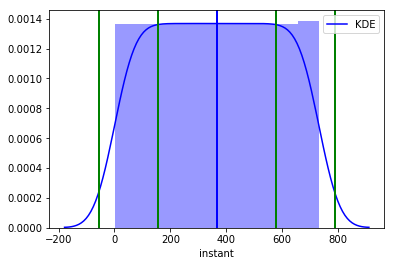




temp


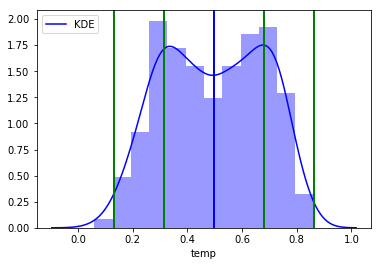




atemp


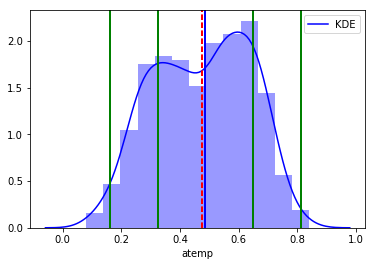




hum


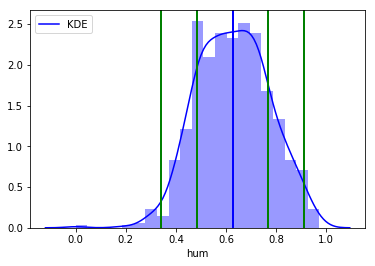




windspeed


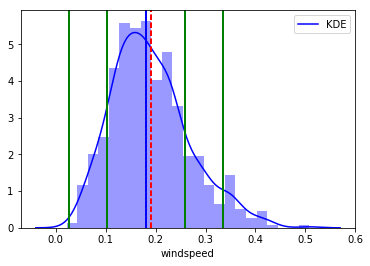




casual


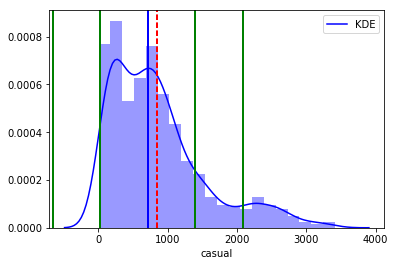




registered


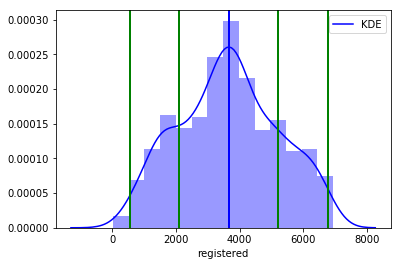




instant : 


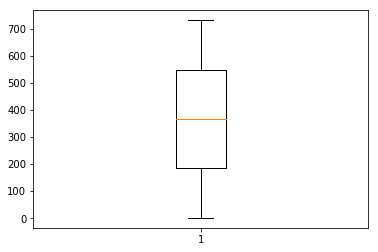




temp : 


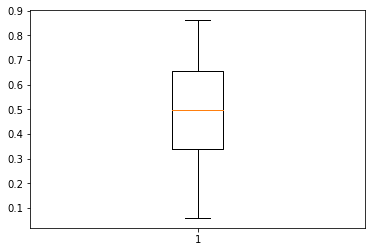




atemp : 


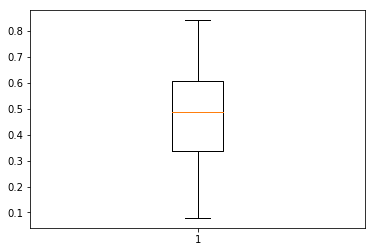




hum : 


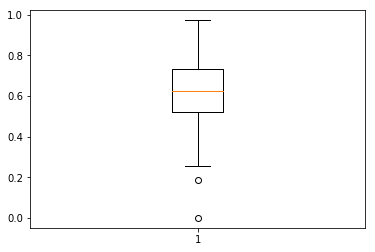




windspeed : 


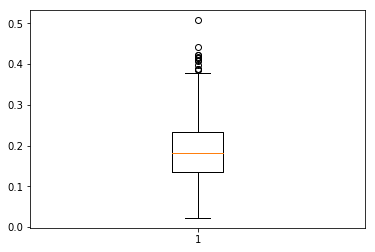




casual : 


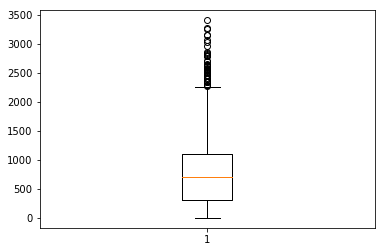




registered : 


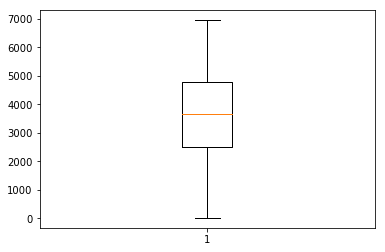

In [4]:
# exploratory data-analysis
for col in df.columns:
    print (col,': ',df[col].dtype)
    
# when looking into the data, we understand that season,year(yr),mnth, holiday,weekday,weathersit should be categorical 
# even though Python shows them int64, these would have to be converted into object types
for col in ['season','yr','holiday','weekday','workingday','weathersit']:
    df[col] = df[col].astype('object')
    print (col,': ',df[col].dtype)
    
def missing(df):
    missing_val = pd.DataFrame(df.isnull().sum())
    missing_val = missing_val.reset_index()
    missing_val = missing_val.rename(columns={'index':'varaibles',0:'percentage'})
    missing_val['percentage'] = (missing_val['percentage']/len(df))*100
    missing_val = missing_val.sort_values('percentage',ascending=False)
    return missing_val

print (missing(df))
# so we can see there are no missing values

# lets create lists on continuous and categorical-column names
cnames = ['instant','temp','atemp','hum','windspeed','casual','registered'] # continuous
cat_names = ['dteday','season','yr','mnth','holiday','weekday','workingday','weathersit'] # categorical

# making histograms(probability-density functions) to see the distribution of data
import matplotlib.pyplot as plt
import seaborn as sns

def histograms(df):
    for col in cnames:
        print (col)
        meanVal = np.mean(df[col])
        medianVal = np.median(df[col])
        stdDev = np.std(df[col])
        posDev = medianVal + stdDev
        negDev = medianVal-stdDev
        posDev2nd = medianVal + (2*stdDev)
        negDev2nd = medianVal-(2*stdDev)
        #df[col].hist()
        sns.distplot(df[col],norm_hist=True,color='blue',kde_kws={'label':'KDE'}) # histogram with the kernel-distribution line.
        plt.axvline(meanVal, color = 'r', linestyle = 'dashed', linewidth = 2) # plotting mean line
        plt.axvline(medianVal,color='b',linewidth=2) # plotting median line
        plt.axvline(posDev, color='g', linewidth=2) # plotting positive standard-deviation line
        plt.axvline(negDev, color='g', linewidth=2) # plotting negative        "         " line
        plt.axvline(posDev2nd, color='g', linewidth=2) # plotting 2nd positive standard-deviation line
        plt.axvline(negDev2nd, color='g', linewidth=2) # plotting 2nd negative        "         " line
        plt.show()
        print ('\n\n')
    
histograms(df)    
# from the probability-density-functions, we can conclude that:
#  'instant' variable is more like an index, and it shows uniformity that's why, so we can ignore it's inferences,
#  'temp,'atemp','humidity' and 'windspeed' variables have a pretty-decent normal-distribution as shown in the graph as their-
#   mean and median line-plots are pretty close and nearly-coinciding in some cases, even the kernel-distribution line shows that
#   most of the data is within one standard-deviation both sides of the median
#   However, the 'casual' variable is skewed more towards the right inspite of majority of the data being in a normal-range.
#   Let's work on the outlier-analyis of the data.

def outlierPlot(df):
    for col in cnames:
        print (col,': ')
        plt.boxplot(df[col])
        plt.show()
        print ('\n\n')

outlierPlot(df)       
# from the outlier-analyis, we can confirm that:
# 'hum' variable has some outlier on the lower-side
# 'windspeed' variable also has considerable outliers on the upper-side
# 'casual' variable also has many outliers on the upper-side
# Let's work on the outlier-removal






In [5]:
#because 'instant' variable acts just like a serial number and when visualized we see that it's distribution may not contribute 
# in any way to the target variable, so we will remove it
cnames.remove('instant')
df = pd.DataFrame(data=df,columns=[c for c in df.columns if c!='instant'])
print (df.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


outlier-removal of:  temp
outlier-removal of:  atemp
outlier-removal of:  hum
outlier-removal of:  windspeed
outlier-removal of:  casual
outlier-removal of:  registered
     varaibles  percentage
12      casual    6.019152
11   windspeed    1.778386
10         hum    0.273598
0       dteday    0.000000
1       season    0.000000
2           yr    0.000000
3         mnth    0.000000
4      holiday    0.000000
5      weekday    0.000000
6   workingday    0.000000
7   weathersit    0.000000
8         temp    0.000000
9        atemp    0.000000
13  registered    0.000000
14         cnt    0.000000


C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


     varaibles  percentage
0       dteday         0.0
1       season         0.0
2           yr         0.0
3         mnth         0.0
4      holiday         0.0
5      weekday         0.0
6   workingday         0.0
7   weathersit         0.0
8         temp         0.0
9        atemp         0.0
10         hum         0.0
11   windspeed         0.0
12      casual         0.0
13  registered         0.0
14         cnt         0.0
temp


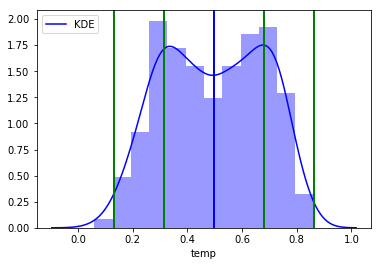




atemp


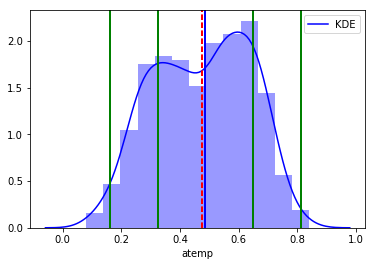




hum


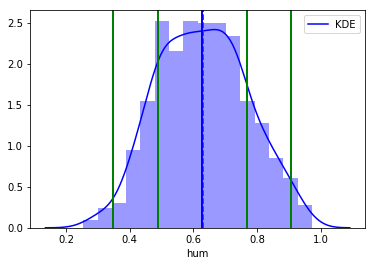




windspeed


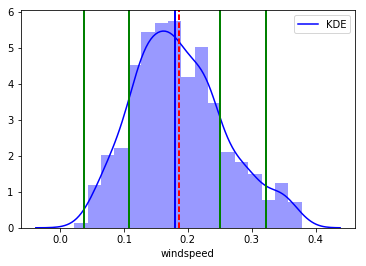




casual


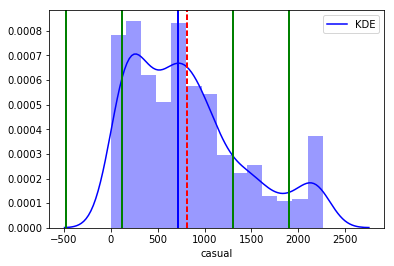




registered


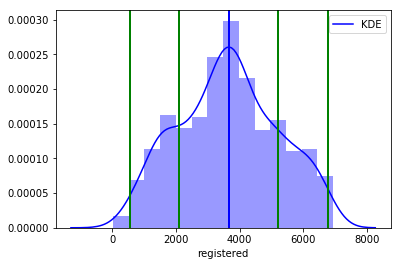




temp : 


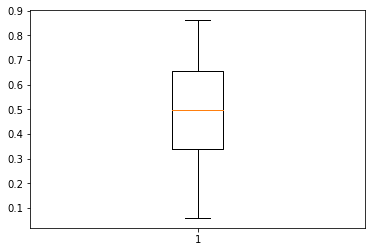




atemp : 


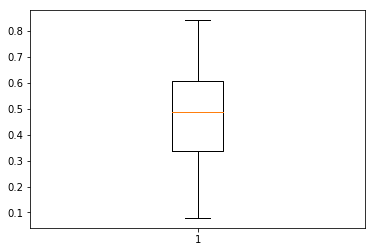




hum : 


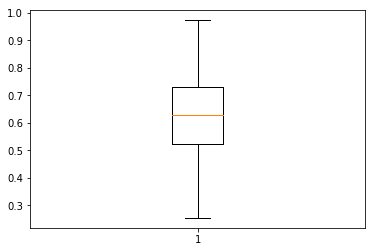




windspeed : 


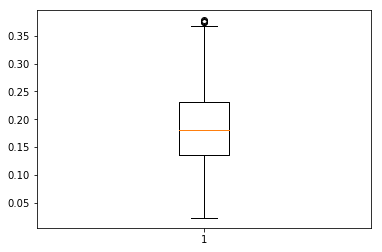




casual : 


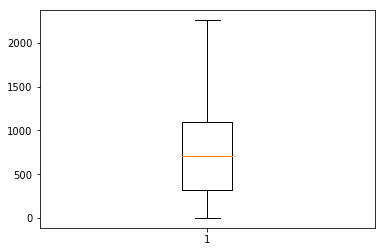




registered : 


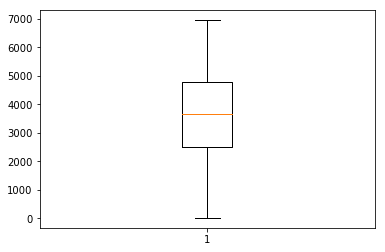

In [6]:



# defining function for outlier-removal (substituting with NaN values for imputation later)
def outlierRemoval(df):
    for col in cnames:
        print ('outlier-removal of: ',col)
        q75,q25 = np.percentile(df[col],[75,25])
        iqr = q75-q25
        maximum = q75 + (iqr*1.5)
        minimum = q25 - (iqr*1.5)
        df.loc[df[col] > maximum,col]= np.nan # remove outliers on the upper-side
        df.loc[df[col] < minimum,col]= np.nan # remove outliers on the lower-side
        
outlierRemoval(df)

# Let's look as the missing-value variable percentages
print (missing(df))
# after outlier-removal we can see only casual, windspeed and hum variables need imputation and no-need to drop the variables as
# missing values are below 30%

from missingpy import KNNImputer # imputer library for python 3.5.2
# Doing KNN-imputation over the dataframe
df = pd.DataFrame(KNNImputer(n_neighbors=3, weights="uniform").fit_transform(df), columns = df.columns)

# checking if any missing-values after imputation
print (missing(df))
# no-missing-values

# Let's do visualizations to see the distribution and outlier-analysis after outlier-analyis and imputations
histograms(df)
outlierPlot(df)

 




                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.122347  -0.144616  0.586520    0.540012   
atemp       0.991702  1.000000  0.135958  -0.170219  0.586476    0.544192   
hum         0.122347  0.135958  1.000000  -0.204467 -0.084702   -0.114804   
windspeed  -0.144616 -0.170219 -0.204467   1.000000 -0.171780   -0.207415   
casual      0.586520  0.586476 -0.084702  -0.171780  1.000000    0.415540   
registered  0.540012  0.544192 -0.114804  -0.207415  0.415540    1.000000   
cnt         0.627494  0.631066 -0.124400  -0.220420  0.679680    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.124400  
windspeed  -0.220420  
casual      0.679680  
registered  0.945517  
cnt         1.000000  


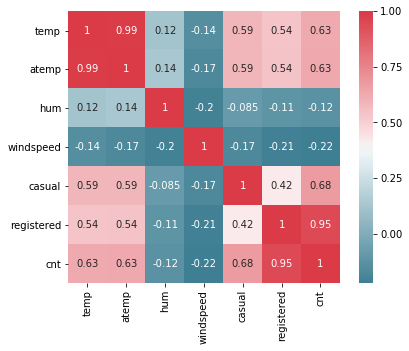

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')


In [9]:
# Feature selection
# Doing correlation analysis
df_corr = df.loc[:,(cnames+['cnt'])]
corr = df_corr.corr()
print (corr)
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,
            square=True, ax=ax)
plt.show()



In [ ]:
# correlation plot shows 'atemp' and 'temp' are highly correlated to each other
# Removing the variable 'atemp' from the dataframe
df = pd.DataFrame(data=df, columns = [col for col in df.columns if col!='atemp'])
cnames.remove('atemp') # removed name from categorical-list
print (df.columns)
# from the heatmap we can see that 'registered' has a very strong linear-relationship with the target 'cnt' variable
# also 'casual' variable has a decent linear-relationship with the target, on exploring the 2 variables: casual & registered, 
# we realize that casual + registered=cnt.
# we can assume that therefore lienar-regression might play a big role in predicting the target variable accurately.

In [10]:


# Doing ANOVA test on all the categorical-variables
from scipy import stats
for col in cat_names:
    fStat, pVal = stats.f_oneway(df[col], df['cnt'])
    print(col,' P-value: ',pVal,' f-statistic: ',fStat)
    if pVal<0.05:
        print ('There is a relationship between col: ',col,' and the target variable')
    else:
        print ('No relationship between col: ',col,' and the target variable')
        
#  the ANOVA test shows all the categorical-variables have a relationship to the target continuous variable



dteday  P-value:  0.0  f-statistic:  3924.4437517500055
There is a relationship between col:  dteday  and the target variable
season  P-value:  0.0  f-statistic:  3947.7137569884007
There is a relationship between col:  season  and the target variable
yr  P-value:  0.0  f-statistic:  3951.216006001141
There is a relationship between col:  yr  and the target variable
mnth  P-value:  0.0  f-statistic:  3940.649636749688
There is a relationship between col:  mnth  and the target variable
holiday  P-value:  0.0  f-statistic:  3952.044375898518
There is a relationship between col:  holiday  and the target variable
weekday  P-value:  0.0  f-statistic:  3946.832768145286
There is a relationship between col:  weekday  and the target variable
workingday  P-value:  0.0  f-statistic:  3950.894412386185
There is a relationship between col:  workingday  and the target variable
weathersit  P-value:  0.0  f-statistic:  3949.6463379356255
There is a relationship between col:  weathersit  and the targe

[6.03158447e-04 1.54727775e-02 5.07353325e-02 1.68830904e-03
 6.04623288e-04 1.19623039e-03 1.92775643e-02 8.63403031e-04
 4.82338152e-02 1.49454233e-03 6.93188046e-04 1.80231084e-01
 6.78905972e-01]


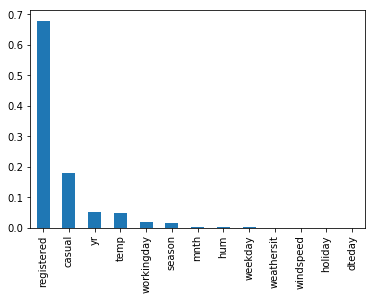

In [13]:
# Let's perform couple of more tests
# Let's perform a feature importance test
# this test gives you a score for each feature of your data, the higher score shows more importance/relevance 
# of that feature towards your target variable
# it uses a tree-based classifiers approach

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor

X = df.iloc[:,:-1]
y = df['cnt']
importances = ExtraTreesRegressor().fit(X,y)
print (importances.feature_importances_)

# Let's look at the scores visually

values = pd.Series(importances.feature_importances_, index = df.columns[:-1])
values.nlargest(df.shape[1]-1).plot(kind='bar')
plt.figsize=(10,15)
plt.show()
# registered shows highest importance in predicting the target 'cnt'
# casual shows some, not highly, followed by year, temp, workingday in a much lower manner.
# the variables month,hum,weekday,weathersit,windspeed,holiday,dteday are shown to have negligible importances.
# Let's perform 2 more importance/feature selections tests to see if it's true.

In [16]:
# source: https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
from sklearn.linear_model import Lasso, LinearRegression # Lasso is L1 regularization
from sklearn.feature_selection import SelectFromModel

# fitting the feature selection model with the Logistic regression data
sel_ = SelectFromModel(Lasso(alpha=0.3))

sel_.fit(df.iloc[:,:-1], df['cnt'])
#sel_.fit(df[numeric], df['Class'])

# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())

#  So True is for the features that lasso thought is important (non-zero features) 
# while False is for the features whose weights were shrinked to zero and are not important according to Lasso.


selected_feat = df.iloc[:,:-1].columns[(sel_.get_support())] # gives the remaining features

print ('important: ',selected_feat)
# this method is showing all the remaining variables are important
print ('not-important: ',[i for i in df.columns[:-1] if i not in selected_feat])

[ True  True  True  True False  True  True  True  True False  True  True
  True]
important:  Index(['dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit',
       'temp', 'windspeed', 'casual', 'registered'],
      dtype='object')
not-important:  ['holiday', 'hum']


In [17]:
# source: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel

# fitting the feature selection model with the random forest regression data
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))

sel_.fit(df.iloc[:,:-1], df['cnt'])
#sel_.fit(df[numeric], df['Class'])

# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())

#  So True is for the features that trees have voted to be important 
# while False is for the features voted on average to be not necessary


selected_feat = df.iloc[:,:-1].columns[(sel_.get_support())] # gives the remaining features

print ('important: ',selected_feat)
print ('\n')
print ('not-important: ',[i for i in df.columns[:-1] if i not in selected_feat])

[ True  True  True  True False  True  True  True  True False  True  True
  True]
important:  Index(['dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit',
       'temp', 'windspeed', 'casual', 'registered'],
      dtype='object')


not-important:  ['holiday', 'hum']


C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


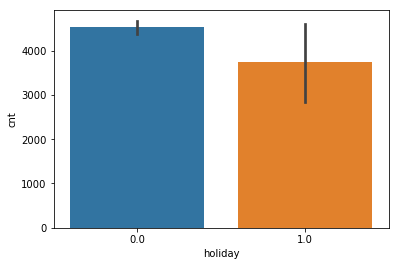

In [19]:
# both Lasso/Linear and Random forest regression's feature importance methods show that ['holiday', 'hum'] are not important
ax = sns.barplot(x='holiday', y="cnt", data=df,estimator=np.mean)
plt.show()
# the average 'cnt' of holiday class doesn't vary much, maybe there isn't mcuh that contributes.


In [ ]:
# What we'll do is, apply 2 ML algorithms and compare which dataframe has better accuracy
# whether actually any overfitting has occured and did it get reduced by the Lasso feature selection method
# based on comparing those 2 dataframe metrics we'll decide which dataframe we'll further use for more algorithms.

In [20]:
# feature scaling
# normalizing the continuous variables
for col in cnames:
    df[col] = (df[col]-min(df[col]))/(max(df[col]) - min(df[col]))
    
    
df2 = df.drop(labels=['holiday', 'hum'],axis=1)
print ('df: ',df.columns)
print ('df2: ',df2.columns)
print ('\n')
print (df2.head())    

df:  Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')
df2:  Index(['dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit',
       'temp', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


   dteday  season   yr  mnth  weekday  workingday  weathersit      temp  \
0     1.0     1.0  0.0   1.0      6.0         0.0         2.0  0.355170   
1     2.0     1.0  0.0   1.0      0.0         0.0         2.0  0.379232   
2     3.0     1.0  0.0   1.0      1.0         1.0         1.0  0.171000   
3     4.0     1.0  0.0   1.0      2.0         1.0         1.0  0.175530   
4     5.0     1.0  0.0   1.0      3.0         1.0         1.0  0.209120   

   windspeed    casual  registered     cnt  
0   0.388102  0.145833    0.091539   985.0  
1   0.635752  0.057181    0.093849   801.0  
2   0.635105  0.052305    0.174560  1349.0  
3   0.3

C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
# dividing the data into train and test for applying the models over them
from sklearn.cross_validation import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2) # df split
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(df2.iloc[:,:-1],df.iloc[:,-1],test_size=0.2) # df2 split

print ('df: ')
print (X_train.shape,Y_train.shape)
print (X_test.shape, Y_test.shape)
print ('\n')
print ('df2: ')
print (X_train2.shape,Y_train2.shape)
print (X_test2.shape, Y_test2.shape)



# function for MAPE
def MAPE(y_true,preds):
    values=[]
    for (x,y) in zip(list(y_true),list(preds)):
        if x==0:
            values.append(abs(y)) # otherwise you get ZeroDivisionError: as 0-y/0 is not defined
        else:    
            values.append((abs(x-y)/x))
    return (sum(values)/100)*len(values)

# metrics for checking the accuracy of our models
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# function to display all regression error metrics
def error_metrics(Y_test,test_preds):    
    rmse_test = np.sqrt(mean_squared_error(Y_test,test_preds))
    print("RMSE testing data = "+str(rmse_test))
    print ('Mean Absolute Percentage Error(MAPE): ',MAPE(Y_test,test_preds))
    print ('Mean-Absoulte-Error (MAE): ',mean_absolute_error(Y_test,test_preds))
    print("R-square Score(coefficient of determination) = "+str(r2_score(Y_test,test_preds)))
    print ('\n\n')

df: 
(584, 13) (584,)
(147, 13) (147,)


df2: 
(584, 11) (584,)
(147, 11) (147,)


In [27]:
from sklearn.linear_model import LinearRegression

# OLS is the method which helps to calculate the co-efficients: b0, b1, b2, b3 and so on.
model = LinearRegression().fit(X_train, Y_train) 
LR_preds = model.predict(X_test)
print (error_metrics(Y_test,(LR_preds)))


# the lasso feature selection model
model2 = LinearRegression().fit(X_train2, Y_train2) 
LR_preds2 = model2.predict(X_test2)
print (error_metrics(Y_test2,(LR_preds2)))

RMSE testing data = 133.77577958624946
Mean Absolute Percentage Error(MAPE):  3.923233811696839
Mean-Absoulte-Error (MAE):  71.9499643970373
R-square Score(coefficient of determination) = 0.9948755631258149



None
RMSE testing data = 121.69875323217583
Mean Absolute Percentage Error(MAPE):  3.4266933492255776
Mean-Absoulte-Error (MAE):  68.0499858405857
R-square Score(coefficient of determination) = 0.9959416179514687



None


In [30]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor().fit(X_train,Y_train)
DT_preds = DT_model.predict(X_test)
print(error_metrics(Y_test,DT_preds))

DT_model2 = DecisionTreeRegressor().fit(X_train2,Y_train2)
DT_preds2 = DT_model2.predict(X_test2)
print (error_metrics(Y_test2,DT_preds2))

RMSE testing data = 227.2743405013864
Mean Absolute Percentage Error(MAPE):  8.391044981730252
Mean-Absoulte-Error (MAE):  149.24489795918367
R-square Score(coefficient of determination) = 0.9852091892936911



None
RMSE testing data = 236.23443331359042
Mean Absolute Percentage Error(MAPE):  9.003480806093629
Mean-Absoulte-Error (MAE):  152.35374149659864
R-square Score(coefficient of determination) = 0.9847079020637403



None


In [32]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor().fit(X_train,Y_train)
RF_preds = RF_model.predict(X_test)
error_metrics(Y_test,RF_preds)

RF_model2 = RandomForestRegressor().fit(X_train2,Y_train2)
RF_preds2 = RF_model2.predict(X_test2)
error_metrics(Y_test2,RF_preds2)

RMSE testing data = 151.8977923464587
Mean Absolute Percentage Error(MAPE):  5.455450283134648
Mean-Absoulte-Error (MAE):  97.30204081632651
R-square Score(coefficient of determination) = 0.9933931554213633



RMSE testing data = 158.9668670822067
Mean Absolute Percentage Error(MAPE):  5.3680141813417155
Mean-Absoulte-Error (MAE):  99.29591836734694
R-square Score(coefficient of determination) = 0.9930754126071334





In [31]:
from sklearn.neighbors import KNeighborsRegressor
K_model = KNeighborsRegressor().fit(X_train,Y_train)
K_preds = K_model.predict(X_test)
error_metrics(Y_test,K_preds)


K_model2 = KNeighborsRegressor().fit(X_train2,Y_train2)
K_preds2 = K_model2.predict(X_test2)
error_metrics(Y_test2,K_preds2)

RMSE testing data = 1477.2617147538722
Mean Absolute Percentage Error(MAPE):  94.9952215815709
Mean-Absoulte-Error (MAE):  1224.2925170068027
R-square Score(coefficient of determination) = 0.375106435871299



RMSE testing data = 1485.1842284312584
Mean Absolute Percentage Error(MAPE):  89.12085571857811
Mean-Absoulte-Error (MAE):  1228.891156462585
R-square Score(coefficient of determination) = 0.3955765191621966





In [34]:
from sklearn.svm import SVR
SVR_model = SVR(kernel='linear').fit(X_train,Y_train)
SVR_preds = SVR_model.predict(X_test)
error_metrics(Y_test,SVR_preds)

SVR_model2 = SVR(kernel='linear').fit(X_train2,Y_train2)
SVR_preds2 = SVR_model2.predict(X_test2)
error_metrics(Y_test2,SVR_preds2)

RMSE testing data = 1691.8381489559263
Mean Absolute Percentage Error(MAPE):  114.89365704891661
Mean-Absoulte-Error (MAE):  1351.3889260557141
R-square Score(coefficient of determination) = 0.18038708401946457



RMSE testing data = 1675.217006096932
Mean Absolute Percentage Error(MAPE):  104.98070437917247
Mean-Absoulte-Error (MAE):  1368.6640256385547
R-square Score(coefficient of determination) = 0.23100623865762948





In [35]:
# after applying all the ML models, we observe that except for Decision-Trees and Random Forests, we get better results
# i.e, lower MAPE,MSE,RMSE and better R-square with df2 (lasso/linear/random-forest feature selected dataset)
# 
# as neural networks use a linear-regression based approach for weights and activation, we'll use df2 for it
df2.shape

(731, 12)

In [42]:
# let's apply deep-learning using Keras
from keras import models
from keras import layers

# because the dataset is too small, we need to apply k-fold cross validation over this dataset
# because less dataset can cause more overfitting and creating a validation data out of such small dataset would only capture 
# small variance of the entire dataset and then checking the error metrics of the model over such validation data-
# -would not yield good results
# create a function that returns a model designed as per our feature and problem requirements
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(11,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear')) # because of regression
    # defining the optimizer and loss and accuracy parameters
    model.compile(optimizer='rmsprop',loss='mean_absolute_error',metrics=['mean_absolute_error'])
    return model



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
mean - test loss:  268.31141937671066 
 mean - test accuracy:  268.31141937671066
RMSE testing data = 363.0807803522854
Mean Absolute Percentage Error(MAPE):  18.803277892347218
Mean-Absoulte-Error (MAE):  270.1700680272109
R-square Score(coefficient of determination) = 0.9638767189063455



None


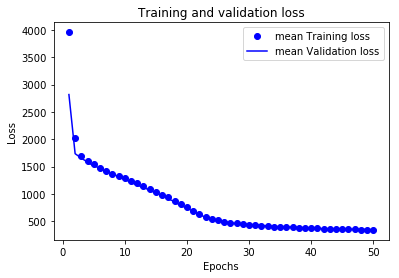

In [46]:
k = 4
num_val_samples = len(X_train2) // k
num_epochs = 50
all_scores = []
loss = np.array([0*num_epochs])
val_loss = np.array([0*num_epochs])

# creating a loop for seperating training and validation data for every fold and storing their respective loss and accuracy values
for i in range(k):
    print('processing fold #', i)
    xval = X_train2[i * num_val_samples: (i + 1) * num_val_samples]
    yval = Y_train2[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train2[:i * num_val_samples],X_train2[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([Y_train2[:i * num_val_samples],Y_train2[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history =  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, validation_data =(xval,yval),verbose=0) # with batch=1 we are going 'sgd'
    # has values training and validation loss
    loss = np.add(loss,history.history['loss'])
    val_loss = np.add(val_loss,history.history['val_loss']) 
    results = model.evaluate(X_test2, Y_test2, verbose=0)
    all_scores.append(results) # results has values loss and accuracy
    
losses = [i[0] for i in all_scores]
acc = [i[1] for i in all_scores]

kpreds = model.predict(X_test2)
kpreds = [round(i[0]) for i in kpreds]

#mean metrics of evaluating the k-fold model on test data 

print ('mean - test loss: ',np.mean(losses),'\n mean - test accuracy: ',np.mean(acc)) 
print (error_metrics(Y_test2,np.array(kpreds)))

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss/4, 'bo', label='mean Training loss')
plt.plot(epochs, val_loss/4, 'b', label='mean Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

(467, 11) (467,)
(117, 11) (117,)
Train on 467 samples, validate on 117 samples
Epoch 1/50
467/467 [==============================] - 4s 8ms/step - loss: 3801.9066 - mean_absolute_error: 3801.9066 - val_loss: 2673.9455 - val_mean_absolute_error: 2673.9455

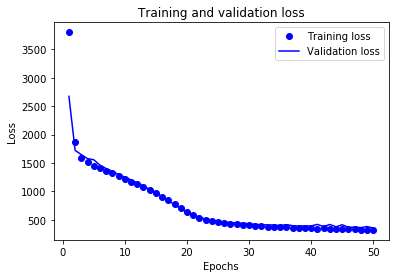

In [48]:
# testing how the individual model with sample parameters scores on test data

ptrain_data ,x_val,ptrain_targets,y_val = train_test_split(X_train2,Y_train2,test_size=0.2,random_state=42)
print (ptrain_data.shape ,ptrain_targets.shape)
print (x_val.shape,y_val.shape)

model = build_model()
history = model.fit(ptrain_data,ptrain_targets,batch_size=1,epochs=50,validation_data=(x_val, y_val))

preds = model.predict(X_test2)
test_results = model.evaluate(X_test2,Y_test2)
for i in range(len(test_results)):
    print (model.metrics_names[i],': ',test_results[i])

preds = [round(i[0]) for i in preds]
print (preds)

error_metrics(Y_test2,np.array(preds))

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#-----------------------------------------------CONCLUSION-------------------------------------------------#

           DNN        SVR       KNN       Random-forests  Decision-Trees  Linear-Regression
RMSE  =    347.73    1675.2    1485.18     158.96           236.23           121.6
MAPE:      17.39 %   104.98 %    89.12 %     5.36 %          9.00 %            3.42 %
MAE:       258.95    1368.66   1228.89      99.29          152.35             68.04
R-square = 0.96      0.23         0.39       0.99            0.98              0.99
 
# of all the models applied over df2, the most suitable is Linear Regression with lowest MAPE: 3.42 % and highest R-Square 0.99 